In [2]:
# load libraries
library(tidyverse)
library(dplyr)
library(ggplot2)
library(palmerpenguins)
library(car)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [3]:
### examples with the penguins dataset:
### https://statsandr.com/blog/two-way-anova-in-r/

# rename
data <- penguins
str(data) # 8 diff categories

# get the species, sex, and body mass columns, put into a new table
processed_data <- select(data, species, sex, body_mass_g)
head(processed_data)

# drop the N/A rows in the sex column
filtered_data <- filter(processed_data, sex != "N/A")
head(filtered_data)


tibble [344 x 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


species,sex,body_mass_g
<fct>,<fct>,<int>
Adelie,male,3750
Adelie,female,3800
Adelie,female,3250
Adelie,NA,NA
Adelie,female,3450
Adelie,male,3650


species,sex,body_mass_g
<fct>,<fct>,<int>
Adelie,male,3750
Adelie,female,3800
Adelie,female,3250
Adelie,female,3450
Adelie,male,3650
Adelie,female,3625


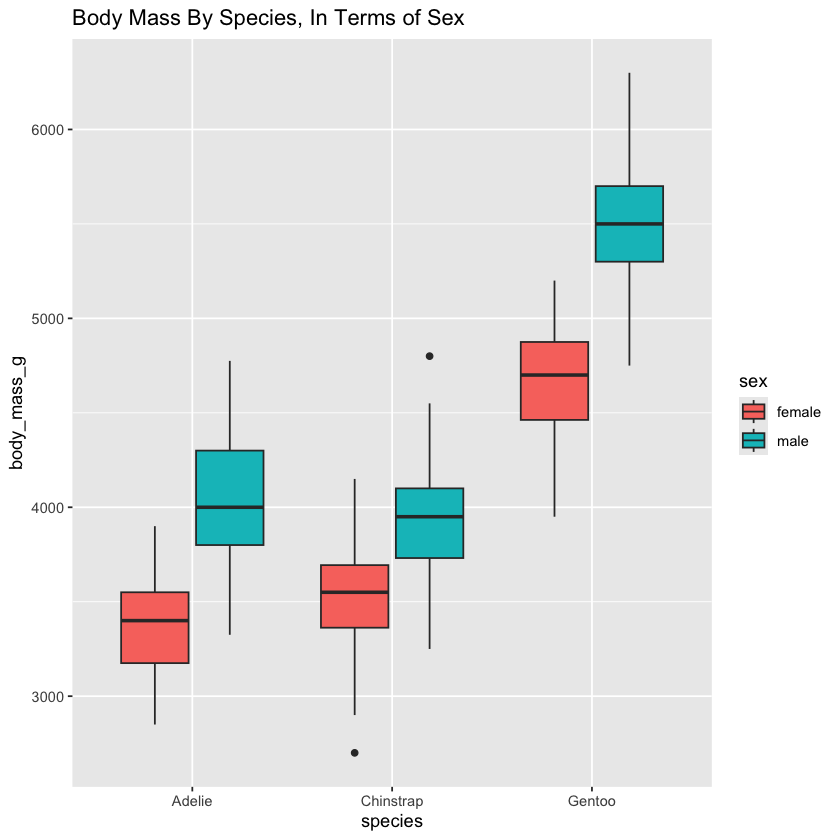

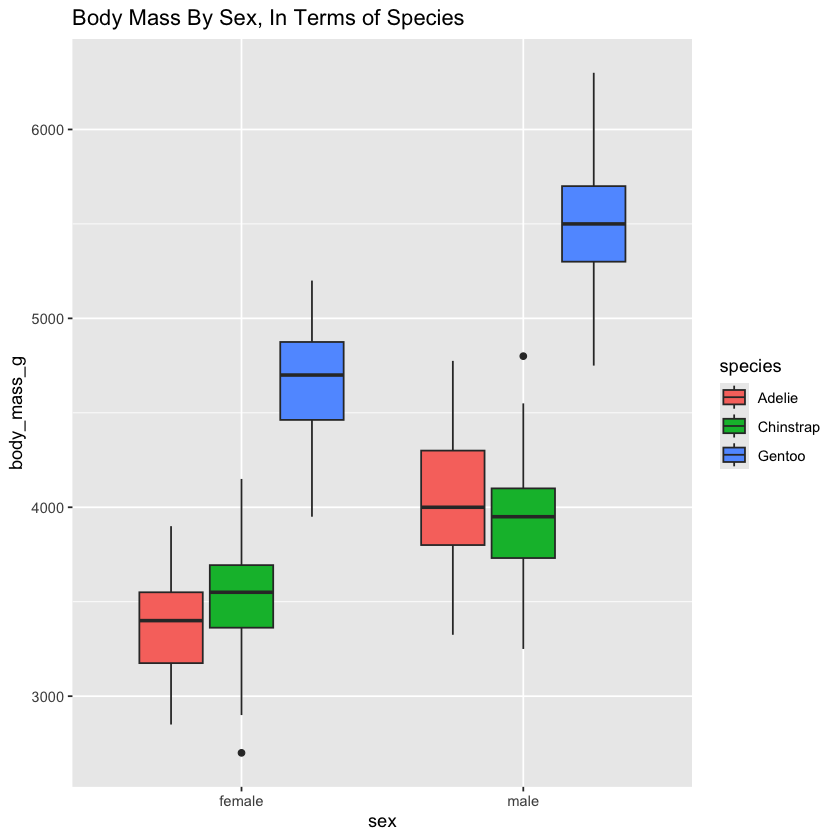

In [4]:
# box plotting the filtered data
penguin_plot <- ggplot(
    filtered_data,
    aes(
        x = species,
        y = body_mass_g,
        fill = sex
    )
) +
    geom_boxplot() +
    ggtitle("Body Mass By Species, In Terms of Sex")

# could also have swapped sex and species, i.e:
penguin_plot_mod <- ggplot(
    filtered_data,
    aes(x = sex, y = body_mass_g, fill = species)
)
penguin_plot2 <- penguin_plot_mod +
    geom_boxplot() +
    ggtitle("Body Mass By Sex, In Terms of Species")

penguin_plot
penguin_plot2


In [5]:
# run anova
penguin_plot_anova <- aov(body_mass_g ~ sex * species, data = processed_data)

# note: interaction is significant b/c p value <= 0.05, therefore use * not +
summary(penguin_plot_anova)


             Df    Sum Sq  Mean Sq F value   Pr(>F)    
sex           1  38878897 38878897 406.145  < 2e-16 ***
species       2 143401584 71700792 749.016  < 2e-16 ***
sex:species   2   1676557   838278   8.757 0.000197 ***
Residuals   327  31302628    95727                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
11 observations deleted due to missingness

In [6]:
penguin_plot_anova_lm <- lm(body_mass_g ~ sex + species, data = processed_data)
anova(penguin_plot_anova_lm)
Anova(penguin_plot_anova_lm)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
sex,1,38878897,38878896.9,387.8555,1.366199e-57
species,2,143401584,71700792.0,715.2863,1.618971e-120
Residuals,329,32979185,100240.7,NA,NA


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
sex,37090262,1,370.0121,8.729411e-56
species,143401584,2,715.2863,1.618971e-120
Residuals,32979185,329,NA,NA
